In [ ]:
# install dependencies

In [2]:
# load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Lottery Aid to Education

In [20]:
# load lottery_aid
dataset = pd.read_csv("/kaggle/input/is-lottery-a-game-of-luck/Lottery_Aid_to_Education__Beginning_2002.csv")
dataset.columns = dataset.columns.str.strip()
dataset.head()

,Beginning Fiscal Year,Ending Fiscal Year,County,School District,Amount of Aid
0,2002,2003,Albany,Albany,7242297.04
1,2002,2003,Albany,Berne-Knox-Westerlo,874046.94
2,2002,2003,Albany,Bethlehem,2786954.71
3,2002,2003,Albany,Cohoes,1820297.94
4,2002,2003,Albany,Green Island,241859.93


In [21]:
# check null values
dataset.isnull().sum()

Beginning Fiscal Year    0
Ending Fiscal Year       0
County                   0
School District          0
Amount of Aid            0
dtype: int64

In [22]:
# get general information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14294 entries, 0 to 14293
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Beginning Fiscal Year  14294 non-null  int64  
 1   Ending Fiscal Year     14294 non-null  int64  
 2   County                 14294 non-null  object 
 3   School District        14294 non-null  object 
 4   Amount of Aid          14294 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 558.5+ KB


In [23]:
# get statistical information
dataset.describe()

,Beginning Fiscal Year,Ending Fiscal Year,Amount of Aid
count,14294.000000,14294.000000,1.429400e+04
mean,2011.983280,2012.983280,4.333710e+06
std,6.059969,6.059969,4.382022e+07
min,2002.000000,2003.000000,0.000000e+00
25%,2007.000000,2008.000000,6.234273e+05
50%,2012.000000,2013.000000,1.542293e+06
75%,2017.000000,2018.000000,3.121398e+06
max,2022.000000,2023.000000,1.415935e+09


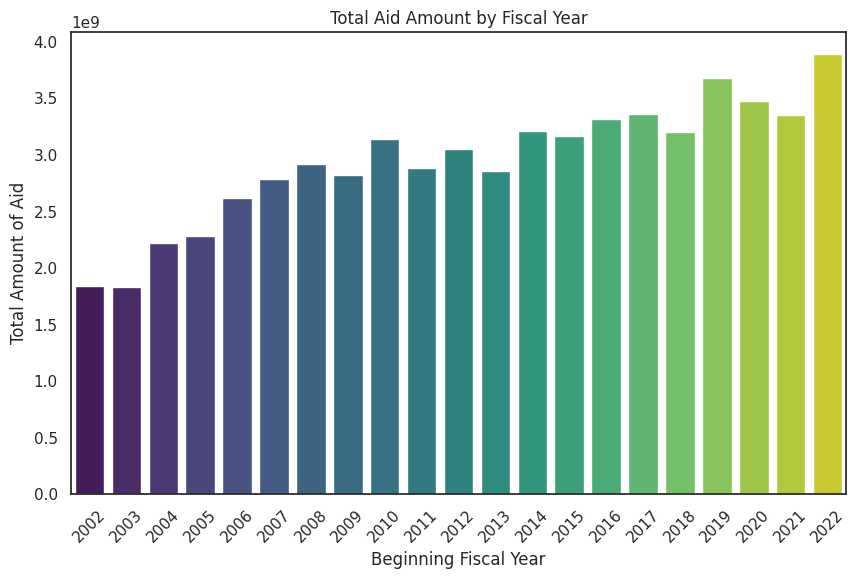

In [24]:
# Total Aid Amount by Fiscal Year
sns.reset_orig()
plt.figure(figsize=(10, 6))
sns.set_theme(style = "white", palette = "deep", context = "notebook")

total_aid_by_year = dataset.groupby("Beginning Fiscal Year")["Amount of Aid"].sum().reset_index()

sns.barplot(x="Beginning Fiscal Year", y="Amount of Aid", data=total_aid_by_year, palette="viridis")
plt.title("Total Aid Amount by Fiscal Year")
plt.xlabel("Beginning Fiscal Year")
plt.ylabel("Total Amount of Aid")
plt.xticks(rotation=45)
plt.show()
plt.close()

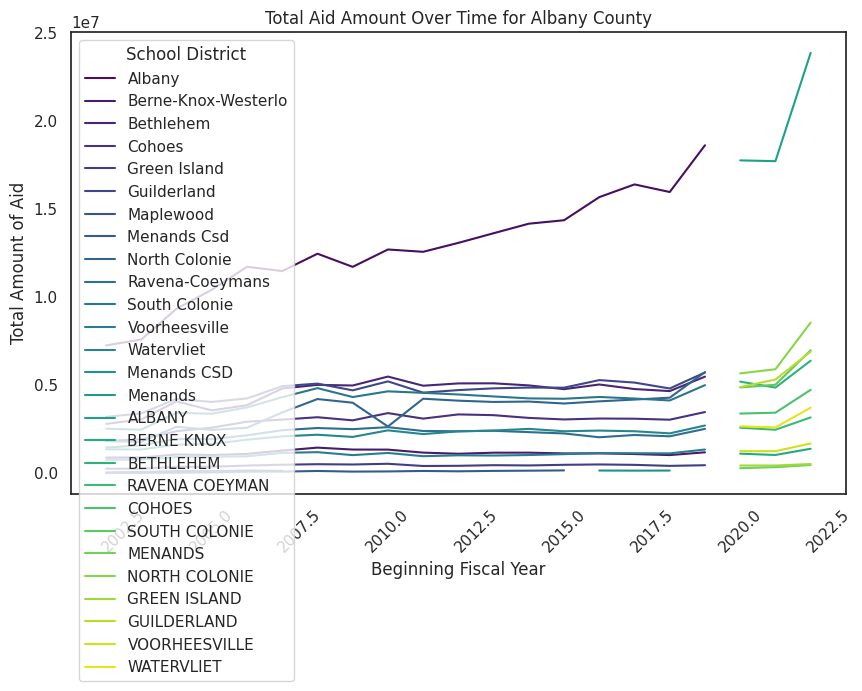

In [33]:
# Total Aid Amount Over Time for a Specific County
specific_county = "Albany"
county_data = dataset[dataset["County"] == specific_county]

sns.reset_orig()
plt.figure(figsize=(10, 6))
sns.set_theme(style = "white", palette = "deep", context = "notebook")

sns.lineplot(x="Beginning Fiscal Year", y="Amount of Aid", data=county_data, hue="School District", palette="viridis")
plt.title(f"Total Aid Amount Over Time for {specific_county} County")
plt.xlabel("Beginning Fiscal Year")
plt.ylabel("Total Amount of Aid")
plt.xticks(rotation=45)
plt.show()
plt.close()


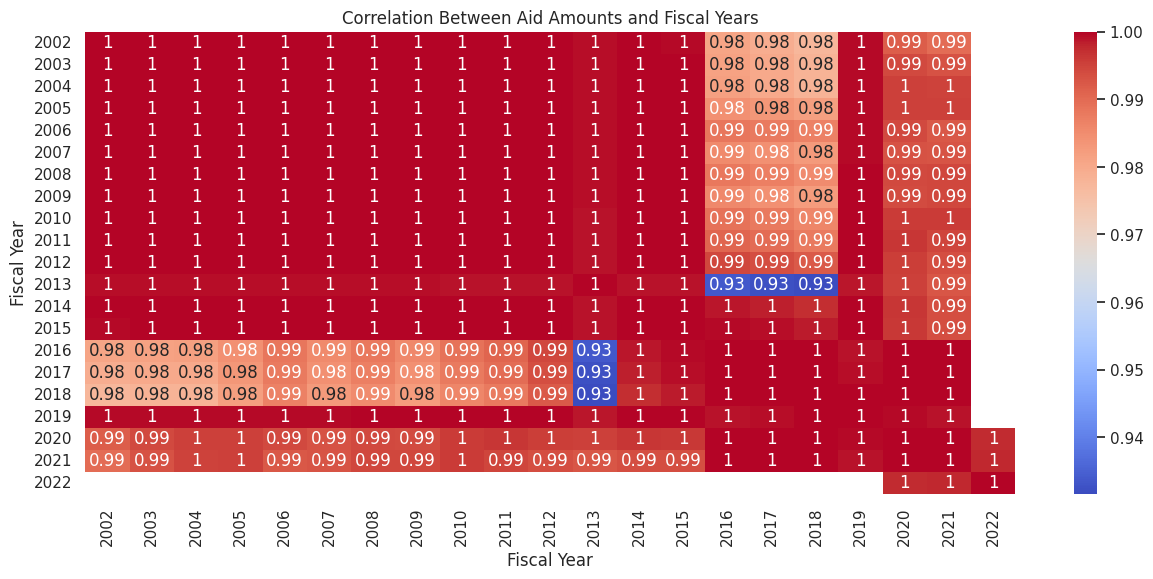

In [38]:
# Correlation Between Aid Amounts and Fiscal Years
correlation_data = dataset.pivot_table(index="School District", columns="Beginning Fiscal Year", values="Amount of Aid")

sns.reset_orig()
plt.figure(figsize=(15, 6))
sns.set_theme(style = "white", palette = "deep", context = "notebook")

sns.heatmap(correlation_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Aid Amounts and Fiscal Years")
plt.xlabel("Fiscal Year")
plt.xticks(rotation = 'vertical')
plt.ylabel("Fiscal Year")
plt.show()
plt.close()

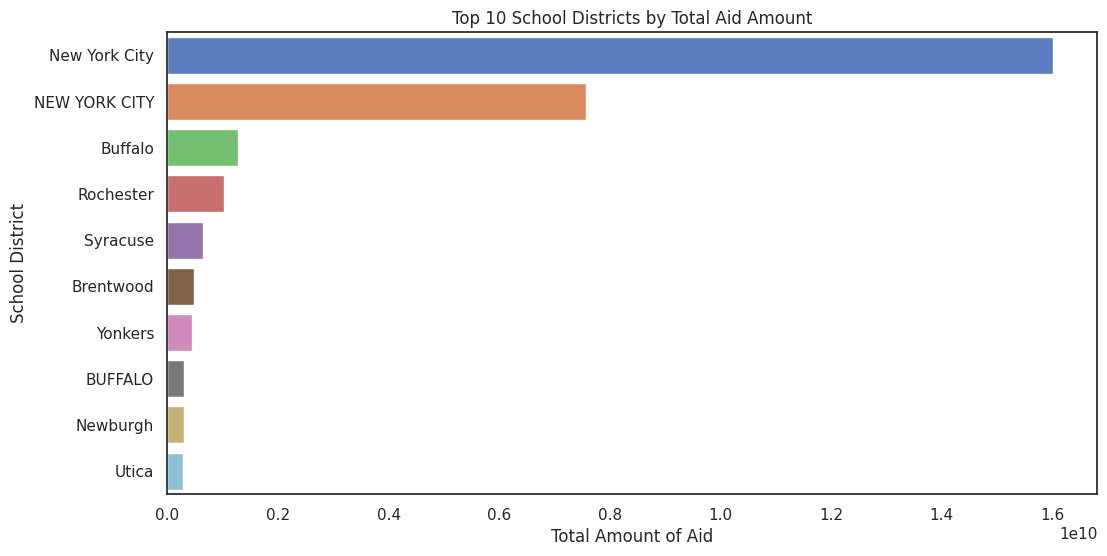

In [40]:
# Top 10 School Districts by Total Aid Amount
total_aid_by_district = dataset.groupby("School District")["Amount of Aid"].sum().reset_index()
top_10_districts = total_aid_by_district.sort_values(by="Amount of Aid", ascending=False).head(10)

sns.reset_orig()
plt.figure(figsize=(12, 6))
sns.set_theme(style = "white", palette = "deep", context = "notebook")

sns.barplot(x="Amount of Aid", y="School District", data=top_10_districts, palette="muted")
plt.title("Top 10 School Districts by Total Aid Amount")
plt.xlabel("Total Amount of Aid")
plt.ylabel("School District")
plt.show()
plt.close()

In [58]:
# solve above where we are seeing same district 
dataset["School District"] = dataset["School District"].str.title()

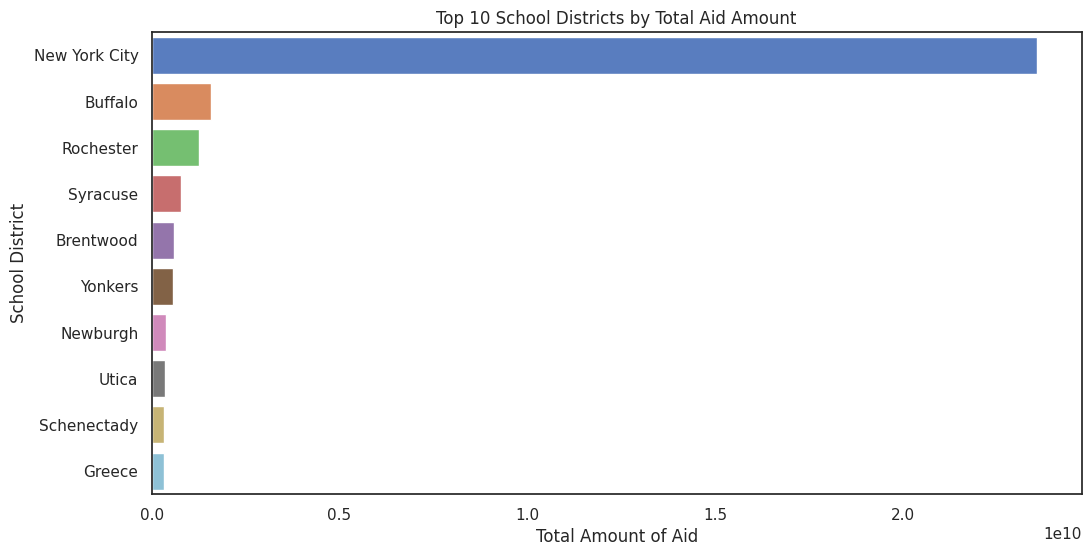

In [59]:
# Top 10 School Districts by Total Aid Amount
total_aid_by_district = dataset.groupby("School District")["Amount of Aid"].sum().reset_index()
top_10_districts = total_aid_by_district.sort_values(by="Amount of Aid", ascending=False).head(10)

sns.reset_orig()
plt.figure(figsize=(12, 6))
sns.set_theme(style = "white", palette = "deep", context = "notebook")

sns.barplot(x="Amount of Aid", y="School District", data=top_10_districts, palette="muted")
plt.title("Top 10 School Districts by Total Aid Amount")
plt.xlabel("Total Amount of Aid")
plt.ylabel("School District")
plt.show()
plt.close()

In [ ]:
# End - 

### Lottery Retailers

In [60]:
# load lottery_aid
dataset = pd.read_csv("/kaggle/input/is-lottery-a-game-of-luck/NYS_Lottery_Retailers.csv")
dataset.columns = dataset.columns.str.strip()
dataset.head()

,Retailer,Name,Street,City,State,Zip,Quick Draw,Latitude,Longitude,Georeference
0,114218,BOLLA 71-08 NORTHERN BLVD,71-08 NORTHERN BLVD,JACKSON HEIGHTS,NY,11372,Y,40.754602,-73.894962,POINT (-73.894962 40.754602)
1,114215,BOLLA 5912 NESCONSET HWY,5912 NESCONSET HIGHWAY,PORT JEFF STA,NY,11776,NaN,40.924499,-73.049175,POINT (-73.049175 40.924499)
2,114189,QUICKLEE'S #31,1722 LAKE RD,HAMLIN,NY,14464,Y,43.295241,-77.919868,POINT (-77.919868 43.295241)
3,114186,DAVID'S MONEY CENTER BX#10,1708 ATLANTIC AVE.,BROOKLYN,NY,11213,NaN,40.677502,-73.934146,POINT (-73.934146 40.677502)
4,114185,DAVID'S MONEY CENTER BX#9,236 FLATBUSH AVE.,BROOKLYN,NY,11217,NaN,40.680524,-73.975082,POINT (-73.975082 40.680524)


In [64]:
# plot geo map
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

gdf = gpd.GeoDataFrame(dataset, 
        geometry=gpd.points_from_xy(dataset['Longitude'], dataset['Latitude']))

m = folium.Map(location=[dataset['Latitude'].mean(), dataset['Longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)
for idx, row in gdf.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=row['Name']).add_to(marker_cluster)
map_html = "retailers_map.html"
m.save(map_html)
IFrame(map_html, width=800, height=600)

In [70]:
# Total Number of Retrailers
# Group by city and calculate the total number of retailers in each city
retailers_by_city = dataset.groupby('City')['Name'].count().reset_index()
retailers_by_city.columns = ['City', 'Total Retailers in City']
retailers_by_city = retailers_by_city.sort_values(by='Total Retailers in City', ascending=False)

# Group by state and calculate the total number of retailers in each state
retailers_by_state = dataset.groupby('State')['Name'].count().reset_index()
retailers_by_state.columns = ['State', 'Total Retailers in State']
retailers_by_state = retailers_by_state.sort_values(by='Total Retailers in State', ascending=False)

# Group by zip code and calculate the total number of retailers in each zip code
retailers_by_zip = dataset.groupby('Zip')['Name'].count().reset_index()
retailers_by_zip.columns = ['Zip', 'Total Retailers in Zip']
retailers_by_zip = retailers_by_zip.sort_values(by='Total Retailers in Zip', ascending=False)

print("Retailers by City:")
print(retailers_by_city.head())

print("\nRetailers by State:")
print(retailers_by_state.head())

print("\nRetailers by Zip Code:")
print(retailers_by_zip.head())

Retailers by City:
          City  Total Retailers in City
119   BROOKLYN                     1498
115      BRONX                      886
696   NEW YORK                      857
123    BUFFALO                      400
857  ROCHESTER                      377

Retailers by State:
  State  Total Retailers in State
0    NY                     14220

Retailers by Zip Code:
       Zip  Total Retailers in Zip
292  11385                     111
247  11220                      92
281  11368                      84
286  11373                      73
285  11372                      69


In [73]:
# Group by city and calculate the prevalence of quick draw services in each city
quick_draw_by_city = dataset.groupby('City')['Quick Draw'].apply(lambda x: (x == 'Y').sum() / len(x)).reset_index()
quick_draw_by_city.columns = ['City', 'Quick Draw Prevalence in City']
quick_draw_by_city = quick_draw_by_city.sort_values(by='Quick Draw Prevalence in City', ascending=False)

# Group by state and calculate the prevalence of quick draw services in each state
quick_draw_by_state = dataset.groupby('State')['Quick Draw'].apply(lambda x: (x == 'Y').sum() / len(x)).reset_index()
quick_draw_by_state.columns = ['State', 'Quick Draw Prevalence in State']
quick_draw_by_state = quick_draw_by_state.sort_values(by='Quick Draw Prevalence in State', ascending=False)

# Group by zip code and calculate the prevalence of quick draw services in each zip code
quick_draw_by_zip = dataset.groupby('Zip')['Quick Draw'].apply(lambda x: (x == 'Y').sum() / len(x)).reset_index()
quick_draw_by_zip.columns = ['Zip', 'Quick Draw Prevalence in Zip']
quick_draw_by_zip = quick_draw_by_zip.sort_values(by='Quick Draw Prevalence in Zip', ascending=False)

# Display the results
print("Quick Draw Prevalence by City:")
print(quick_draw_by_city.head())

print("\nQuick Draw Prevalence by State:")
print(quick_draw_by_state.head())

print("\nQuick Draw Prevalence by Zip Code:")
print(quick_draw_by_zip.head())

Quick Draw Prevalence by City:
           City  Quick Draw Prevalence in City
0        ACCORD                            1.0
627     MEMPHIS                            1.0
610  MASONVILLE                            1.0
606     MARILLA                            1.0
605    MARIETTA                            1.0

Quick Draw Prevalence by State:
  State  Quick Draw Prevalence in State
0    NY                        0.484177

Quick Draw Prevalence by Zip Code:
       Zip  Quick Draw Prevalence in Zip
686  12727                           1.0
842  13113                           1.0
845  13116                           1.0
846  13117                           1.0
851  13132                           1.0


In [ ]:
# End - 

### Scratch Off Daily Prize

In [3]:
# load lottery_aid
dataset = pd.read_csv("/kaggle/input/is-lottery-a-game-of-luck/Scratch-Off_Game_Daily_Prize_Status_Report.csv")
dataset.columns = dataset.columns.str.strip()
dataset.head()

,Game Number,Game Name,Paid,Unpaid,Total,Prize Amount
0,1406,"$10,000,000 BLACK TITANIUM",10322,764,11086,$500
1,1406,"$10,000,000 BLACK TITANIUM",662886,56780,719666,$75
2,1406,"$10,000,000 BLACK TITANIUM",22448,1701,24149,$400
3,1406,"$10,000,000 BLACK TITANIUM",37,3,40,"$5,000"
4,1406,"$10,000,000 BLACK TITANIUM",66943,5135,72078,$200


In [5]:
dataset['Prize Amount'] = dataset['Prize Amount'].str.replace('[^0-9.]', '', regex=True).astype(float)

In [6]:
dataset.head() 

,Game Number,Game Name,Paid,Unpaid,Total,Prize Amount
0,1406,"$10,000,000 BLACK TITANIUM",10322,764,11086,500.0
1,1406,"$10,000,000 BLACK TITANIUM",662886,56780,719666,75.0
2,1406,"$10,000,000 BLACK TITANIUM",22448,1701,24149,400.0
3,1406,"$10,000,000 BLACK TITANIUM",37,3,40,5000.0
4,1406,"$10,000,000 BLACK TITANIUM",66943,5135,72078,200.0


In [8]:
# What is the total prize amount for each game?
total_prize_amount_by_game = dataset.groupby('Game Name')['Prize Amount'].sum().reset_index()
print("Total Prize Amount by Game:")
print(total_prize_amount_by_game)

Total Prize Amount by Game:
                         Game Name  Prize Amount
0   $1,000,000 BONUS WORD CASHWORD     2016900.0
1        $1,000,000 GOLDEN FORTUNE     5003460.0
2             $1,000,000 LUCKY DOG     5002810.0
3              $1,000,000 PREMIERE     5002810.0
4          $10,000 A WEEK FOR LIFE       48465.0
..                             ...           ...
84          X SERIES: 15X CASHWORD       66593.0
85                  X SERIES: 200X    10168450.0
86                   X SERIES: 20X     5003495.0
87                   X SERIES: 50X    15018440.0
88                    X SERIES: 5X        5708.0

[89 rows x 2 columns]


In [9]:
# What is the total number of paid and unpaid tickets for each game?
total_tickets_by_game = dataset.groupby('Game Name')[['Paid', 'Unpaid']].sum().reset_index()
print("Total Tickets (Paid and Unpaid) by Game:")
print(total_tickets_by_game)

Total Tickets (Paid and Unpaid) by Game:
                         Game Name     Paid   Unpaid
0   $1,000,000 BONUS WORD CASHWORD  7233345  1227025
1        $1,000,000 GOLDEN FORTUNE  1052673  1498906
2             $1,000,000 LUCKY DOG  2134550   523035
3              $1,000,000 PREMIERE  2270401   373647
4          $10,000 A WEEK FOR LIFE  4918651   500963
..                             ...      ...      ...
84          X SERIES: 15X CASHWORD  3196996   266382
85                  X SERIES: 200X  2861511  3096729
86                   X SERIES: 20X  3146372   300668
87                   X SERIES: 50X  4032716   108600
88                    X SERIES: 5X  3827131   312680

[89 rows x 3 columns]


In [10]:
# What is the total prize amount for each game category (Paid and Unpaid)?
total_prize_amount_by_category = dataset.groupby('Paid')['Prize Amount'].sum().reset_index()
total_prize_amount_by_category['Paid'] = total_prize_amount_by_category['Paid'].map({1: 'Paid', 0: 'Unpaid'})
print("Total Prize Amount by Category (Paid and Unpaid):")
print(total_prize_amount_by_category)

Total Prize Amount by Category (Paid and Unpaid):
       Paid  Prize Amount
0    Unpaid    25810020.0
1      Paid    28666705.0
2       NaN    57931600.0
3       NaN    37987857.0
4       NaN    71650660.0
..      ...           ...
954     NaN           1.0
955     NaN           2.0
956     NaN           5.0
957     NaN           1.0
958     NaN           5.0

[959 rows x 2 columns]


In [11]:
# What is the average prize amount for each game category (Paid and Unpaid)?
average_prize_amount_by_category = dataset.groupby('Paid')['Prize Amount'].mean().reset_index()
average_prize_amount_by_category['Paid'] = average_prize_amount_by_category['Paid'].map({1: 'Paid', 0: 'Unpaid'})
print("Average Prize Amount by Category (Paid and Unpaid):")
print(average_prize_amount_by_category)


Average Prize Amount by Category (Paid and Unpaid):
       Paid  Prize Amount
0    Unpaid  6.452505e+06
1      Paid  3.583338e+06
2       NaN  2.896580e+06
3       NaN  1.726721e+06
4       NaN  4.214745e+06
..      ...           ...
954     NaN  1.000000e+00
955     NaN  2.000000e+00
956     NaN  5.000000e+00
957     NaN  1.000000e+00
958     NaN  5.000000e+00

[959 rows x 2 columns]


In [ ]:
# End -